In [1]:
# importing the library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_excel("Heart_attack.xlsx")
dataset.head()

,_STATE,DISPCODE,CADULT1,SEXVAR,GENHLTH,MEDCOST1,EXERANY2,EXRACT12,MARITAL,EDUCA,EMPLOY1,_IMPRACE,BPHIGH6,BPMEDS1,TOLDHI3,CHOLMED3,CVDINFR4,?
0,1,1100,NaN,2,2,2,2,NaN,1,5,7.0,1,1,1.0,2.0,2.0,2,2
1,1,1100,NaN,2,2,2,1,1.0,2,5,7.0,1,1,2.0,1.0,1.0,2,2
2,1,1100,NaN,2,4,1,1,1.0,3,4,7.0,2,1,1.0,1.0,1.0,2,2
3,1,1100,NaN,2,2,2,1,1.0,1,5,7.0,1,3,NaN,2.0,2.0,2,2
4,1,1100,NaN,2,4,2,1,1.0,3,5,8.0,1,1,1.0,2.0,2.0,2,2


In [3]:
# Importing the dictionaries
file_paths = {os.path.splitext(file)[0]: os.path.join('Dictionaries/', file)
              for file in os.listdir("Dictionaries") if file.endswith('.xlsx')}

dictionaries = {name: pd.read_excel(path) for name, path in file_paths.items()}
dictionaries.keys(), {name: df.head() for name, df in dictionaries.items()}

(dict_keys(['BPHIGH6', 'BPMEDS1', 'CADULT1', 'CHOLMED3', 'CVDINFR4', 'DISPCODE', 'EDUCA', 'EMPLOY1', 'EXERANY2', 'EXRACT12', 'GENHLTH', 'MARITAL', 'MEDCOST1', 'SEXVAR', 'TOLDHI3', '_IMPRACE', '_STATE']),
 {'BPHIGH6':    Value                          Value Label  Frequency  Percentage  \
  0    1.0                                   No   255182.0       58.89   
  1    NaN         Notes: BPHIGH6 = 2 or 3 or 4        NaN         NaN   
  2    2.0                                  Yes   176222.0       40.67   
  3    NaN                   Notes: BPHIGH6 = 1        NaN         NaN   
  4    9.0  Don’t know/Not Sure/Refused/Missing     1919.0        0.44   
  
     Weighted Percentage  
  0                65.20  
  1                  NaN  
  2                34.28  
  3                  NaN  
  4                 0.52  ,
  'BPMEDS1':    Value           Value Label  Frequency Percentage Weighted Percentage
  0      1                   Yes   144089.0      81.77               76.95
  1      2    

In [4]:
data_dictionary = {
    "_STATE": "State code identifier",
    "DISPCODE": "Display code or survey-related identifier",
    "CADULT1": "Indicator for coronary artery disease history (e.g., 1 for Yes, 2 for No, NaN for missing)",
    "SEXVAR": "Gender of respondent (e.g., 1 for Male, 2 for Female)",
    "GENHLTH": "General health status indicator (e.g., 1 for Excellent, 2 for Very Good, etc.)",
    "MEDCOST1": "Indicator if medical costs were a burden (e.g., 1 for Yes, 2 for No)",
    "EXERANY2": "Exercise indicator (e.g., 1 for Yes, 2 for No)",
    "EXRACT12": "Exercise activity level indicator",
    "MARITAL": "Marital status of respondent",
    "EDUCA": "Education level (e.g., 1 for Less than high school, 2 for High school graduate, etc.)",
    "EMPLOY1": "Employment status",
    "_IMPRACE": "Imputed race identifier",
    "BPHIGH6": "Indicator for history of high blood pressure",
    "BPMEDS1": "Indicator if respondent is on blood pressure medication",
    "TOLDHI3": "Indicator for history of high cholesterol",
    "CHOLMED3": "Indicator if respondent is on cholesterol medication",
    "CVDINFR4": "Indicator for history of cardiovascular infarction (e.g., 1 for Yes, 2 for No)",
    "?": "Unlabeled variable or unknown purpose"
}

# Print the data dictionary with aligned keys
print("Data Dictionary for Heart Attack Dataset:\n")
for key, value in data_dictionary.items():
    print(f"{key.ljust(12)}: {value}")

Data Dictionary for Heart Attack Dataset:

_STATE      : State code identifier
DISPCODE    : Display code or survey-related identifier
CADULT1     : Indicator for coronary artery disease history (e.g., 1 for Yes, 2 for No, NaN for missing)
SEXVAR      : Gender of respondent (e.g., 1 for Male, 2 for Female)
GENHLTH     : General health status indicator (e.g., 1 for Excellent, 2 for Very Good, etc.)
MEDCOST1    : Indicator if medical costs were a burden (e.g., 1 for Yes, 2 for No)
EXERANY2    : Exercise indicator (e.g., 1 for Yes, 2 for No)
EXRACT12    : Exercise activity level indicator
MARITAL     : Marital status of respondent
EDUCA       : Education level (e.g., 1 for Less than high school, 2 for High school graduate, etc.)
EMPLOY1     : Employment status
_IMPRACE    : Imputed race identifier
BPHIGH6     : Indicator for history of high blood pressure
BPMEDS1     : Indicator if respondent is on blood pressure medication
TOLDHI3     : Indicator for history of high cholesterol
CHOLMED3 

In [5]:
# Summary statistics for the dataset
summary_stats = dataset.describe()
summary_stats

,_STATE,DISPCODE,CADULT1,SEXVAR,GENHLTH,MEDCOST1,EXERANY2,EXRACT12,MARITAL,EDUCA,EMPLOY1,_IMPRACE,BPHIGH6,BPMEDS1,TOLDHI3,CHOLMED3,CVDINFR4,?
count,71218.000000,71218.000000,55716.0,71218.000000,71218.000000,71218.000000,71218.000000,54019.000000,71218.000000,71218.000000,70662.000000,71218.000000,71218.000000,29012.000000,63226.000000,63218.000000,71218.000000,71218.000000
mean,6.604749,1119.530175,1.0,1.531495,2.631638,1.930299,1.257688,4.353579,2.475034,5.084192,4.048527,1.922477,2.209090,1.209224,1.620283,1.704689,1.980665,1.996700
std,3.173530,39.643560,0.0,0.499011,1.096111,0.445020,0.547746,7.680474,1.850303,1.078215,2.888773,1.600015,1.064745,0.539502,0.739056,0.629284,0.481285,0.569061
min,1.000000,1100.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1100.000000,1.0,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,6.000000,1100.000000,1.0,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,5.000000,4.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,9.000000,1100.000000,1.0,2.000000,3.000000,2.000000,1.000000,8.000000,4.000000,6.000000,7.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,12.000000,1200.000000,1.0,2.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,6.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


### Descriptive Statistics
- The dataset has columns with a range of values, including categorical variables represented by numerical codes
- Several columns have higher maximum values, like `GENHLTH`, `EXERANY2`, and `EXRACT12` suggesting possible outliers or placeholder codes for missing data.

In [6]:
# Checking for missing values in the dataset
missing_values = dataset.isnull().sum()
missing_values

_STATE          0
DISPCODE        0
CADULT1     15502
SEXVAR          0
GENHLTH         0
MEDCOST1        0
EXERANY2        0
EXRACT12    17199
MARITAL         0
EDUCA           0
EMPLOY1       556
_IMPRACE        0
BPHIGH6         0
BPMEDS1     42206
TOLDHI3      7992
CHOLMED3     8000
CVDINFR4        0
?               0
dtype: int64

### Missing Values
Columns with notable missing values include:
- **CADULT1**: 15,502 missing values
- **EXRACT12**: 17199 missing values
- **EMPLOY1**: 556 missing values
- **BPMEDS1**: 42206 missing values
- **TOLDHI3**: 7992 missing values
- **CHOLMED3**: 8000 missing values

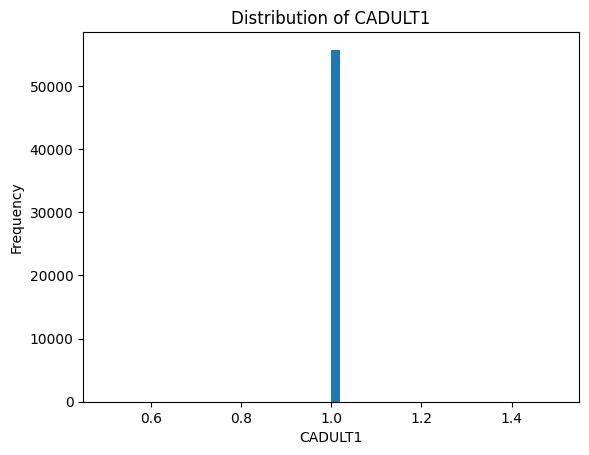

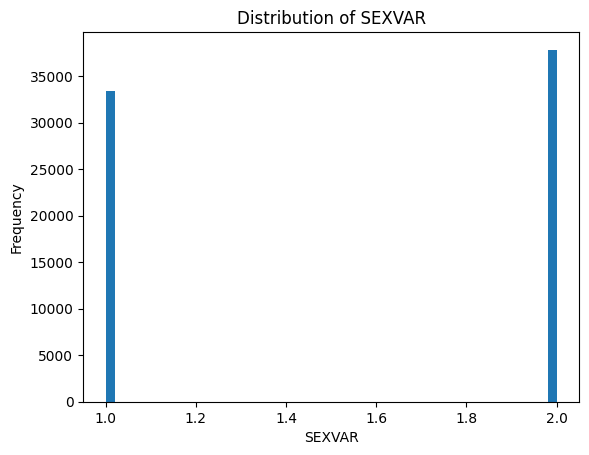

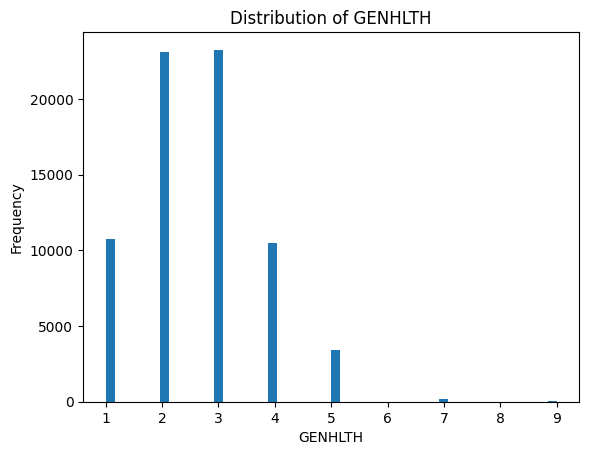

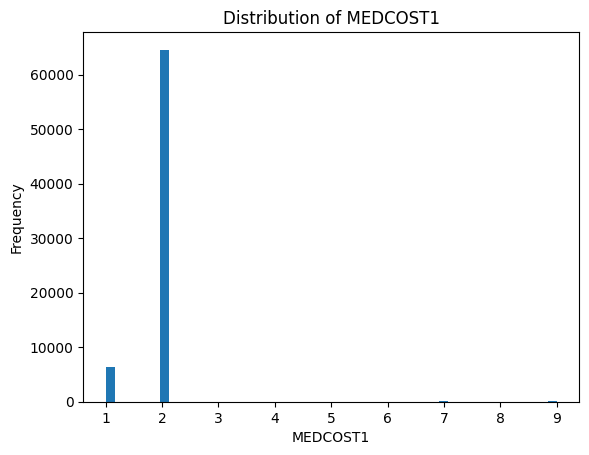

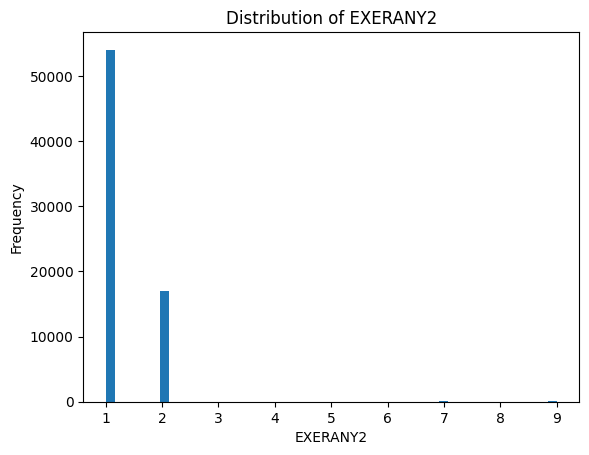

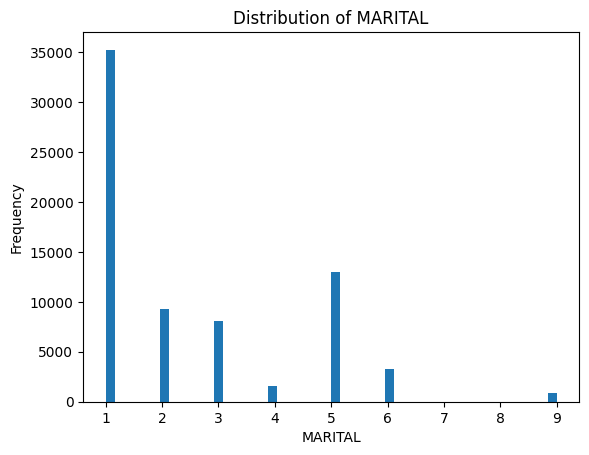

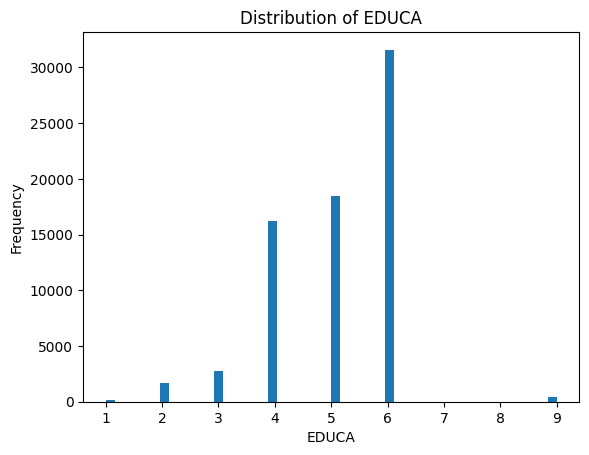

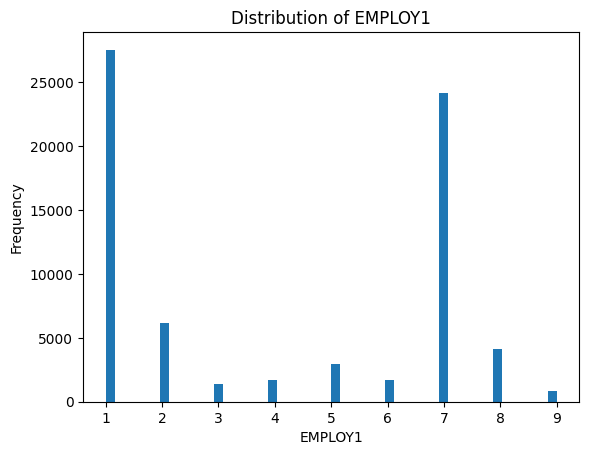

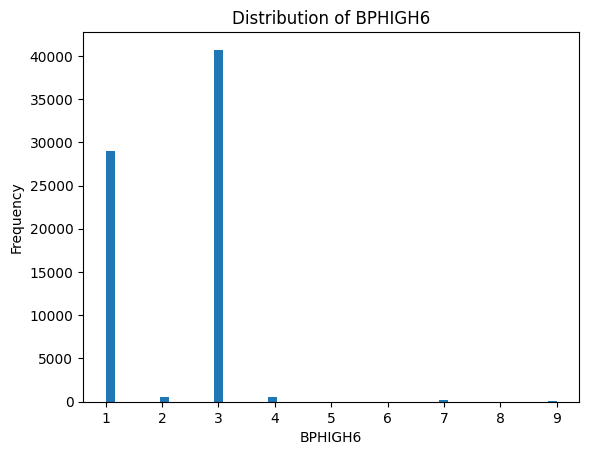

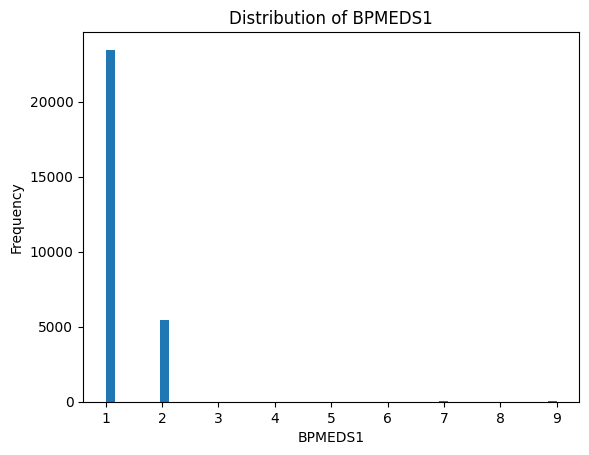

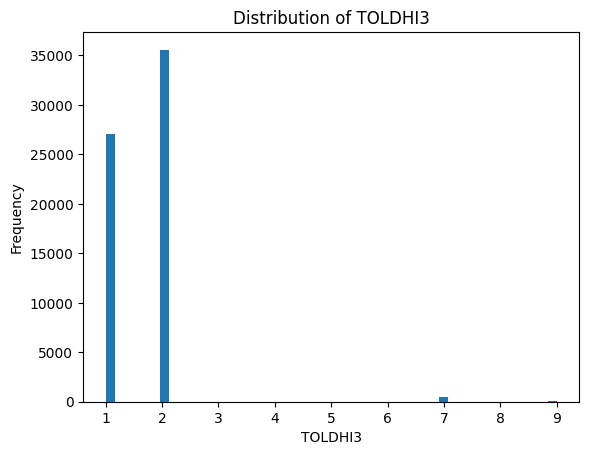

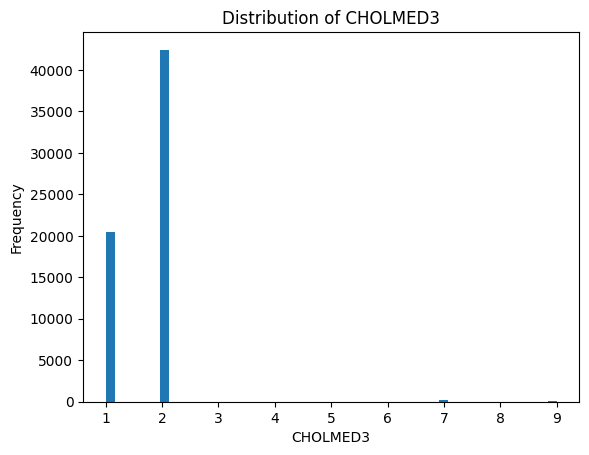

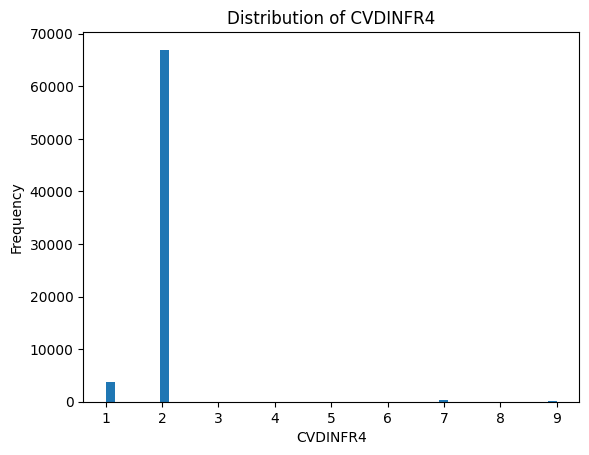

In [10]:
from math import sqrt

# Setting up the plot style
plt.style.use('default')

# Plotting distributions for a few selected columns
col_list = ['CADULT1', 'SEXVAR', 'GENHLTH', 'MEDCOST1', 'EXERANY2', 'MARITAL', 'EDUCA', 'EMPLOY1', 'BPHIGH6', 'BPMEDS1', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4']

for col in col_list:
    bin = (dataset[col].max() - dataset[col].min()) / sqrt(dataset[col].count())
    plt.hist(dataset[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [11]:
# Calculate the mean and standard deviation of each column
summary_stats = pd.DataFrame({
    "Mean": dataset[col_list].mean(),
    "Std": dataset[col_list].std(),
    "25th": (first:=dataset[col_list].quantile(0.25)),
    "75th": (third:=dataset[col_list].quantile(0.75)),
    "IQR": (IQR:=(third - first)),
    "Lower Limit": first - 1.5 * IQR,
    "Upper Limit": third + 1.5 * IQR
})
summary_stats

,Mean,Std,25th,75th,IQR,Lower Limit,Upper Limit
CADULT1,1.000000,0.000000,1.0,1.0,0.0,1.0,1.0
SEXVAR,1.531495,0.499011,1.0,2.0,1.0,-0.5,3.5
GENHLTH,2.631638,1.096111,2.0,3.0,1.0,0.5,4.5
MEDCOST1,1.930299,0.445020,2.0,2.0,0.0,2.0,2.0
EXERANY2,1.257688,0.547746,1.0,1.0,0.0,1.0,1.0
MARITAL,2.475034,1.850303,1.0,4.0,3.0,-3.5,8.5
EDUCA,5.084192,1.078215,4.0,6.0,2.0,1.0,9.0
EMPLOY1,4.048527,2.888773,1.0,7.0,6.0,-8.0,16.0
BPHIGH6,2.209090,1.064745,1.0,3.0,2.0,-2.0,6.0
BPMEDS1,1.209224,0.539502,1.0,1.0,0.0,1.0,1.0


In [12]:
outlier_count = {"Column": [], "Number of Outlier":[]}
for col in col_list:
    less_than_lower = len(dataset[dataset[col] < summary_stats.loc[col, "Lower Limit"]])
    greater_than_upper = len(dataset[dataset[col] > summary_stats.loc[col, "Upper Limit"]])
    outlier_count["Column"].append(col)
    outlier_count["Number of Outlier"].append(less_than_lower + greater_than_upper)
outlier = pd.DataFrame(outlier_count).set_index("Column")
outlier.index.name = None
outlier

,Number of Outlier
CADULT1,0
SEXVAR,0
GENHLTH,3639
MEDCOST1,6650
EXERANY2,17199
MARITAL,850
EDUCA,0
EMPLOY1,0
BPHIGH6,356
BPMEDS1,5542


AttributeError: This method only works with the ScalarFormatter

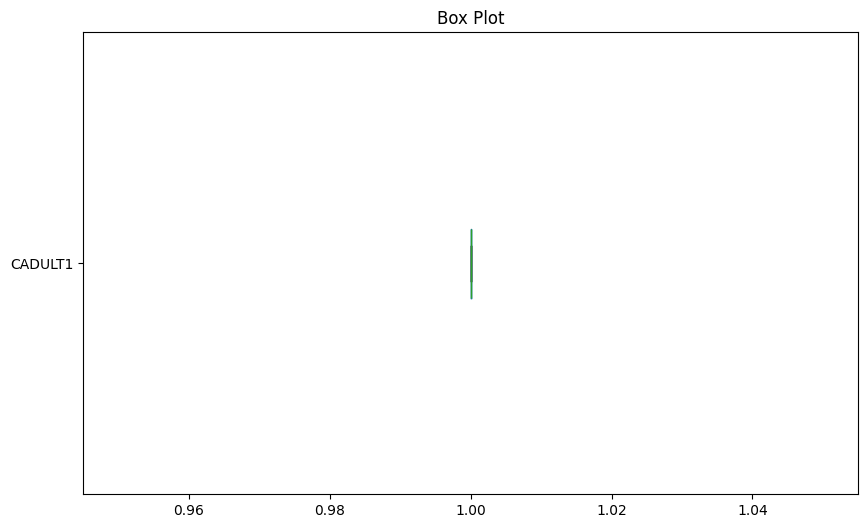

In [24]:
# Draw box plot
for col in col_list:
    plt.figure(figsize=(10, 6))
    dataset.boxplot(column=col)
    plt.title("Box Plot")
    plt.grid(False)
    plt.ticklabel_format(style='plain', axis='y')
    # plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

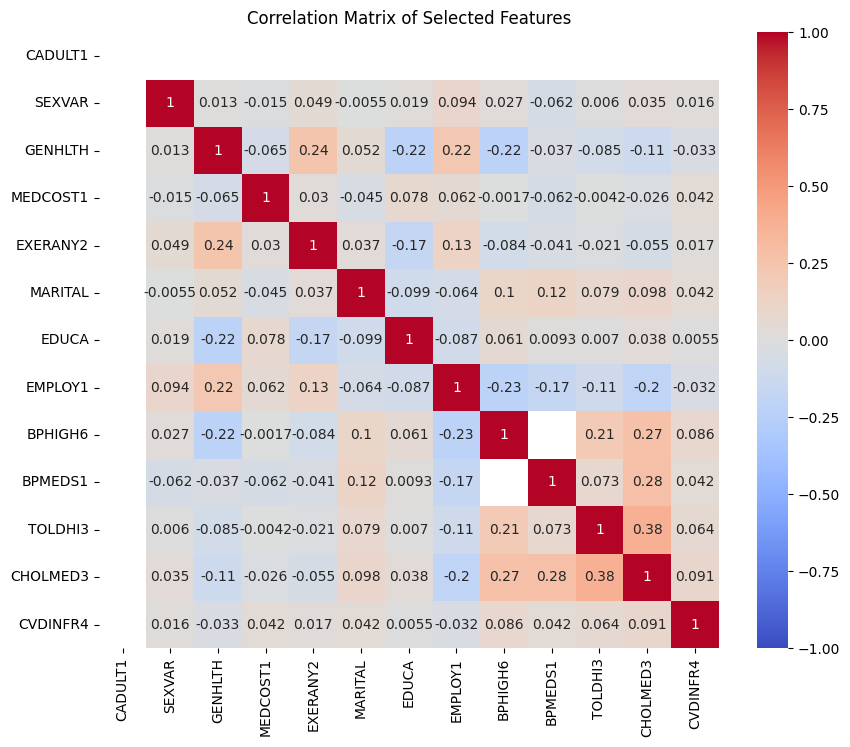

In [8]:
# Calculate correlations among numerical columns
correlation_matrix = dataset[col_list].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

### Correlation
- **BPHIGH6** (blood pressure) and **TOLDHI3** (history oif high cholesterol) have a notable positive correlation, suggesting that individuals with high blood pressure may also have a history of high cholesterol
- **CHOLMED3** (cholesterol medication) and **TOLDHI3** (history oif high cholesterol) have a notable positive correlation, suggesting that individuals with a history of high cholesterol is also taking cholesterol medication
- Other features have weaker correlations, indicating they may not be strongly related in this dataset

In [14]:
# form pairs
pairs = []
for i in range(len(col_list) - 1):
    for j in range(i + 1, len(col_list)):
        pairs.append([col_list[i], col_list[j]])
pairs

[['CADULT1', 'SEXVAR'],
 ['CADULT1', 'GENHLTH'],
 ['CADULT1', 'MEDCOST1'],
 ['CADULT1', 'EXERANY2'],
 ['CADULT1', 'MARITAL'],
 ['CADULT1', 'EDUCA'],
 ['CADULT1', 'EMPLOY1'],
 ['CADULT1', 'BPHIGH6'],
 ['CADULT1', 'BPMEDS1'],
 ['CADULT1', 'TOLDHI3'],
 ['CADULT1', 'CHOLMED3'],
 ['CADULT1', 'CVDINFR4'],
 ['SEXVAR', 'GENHLTH'],
 ['SEXVAR', 'MEDCOST1'],
 ['SEXVAR', 'EXERANY2'],
 ['SEXVAR', 'MARITAL'],
 ['SEXVAR', 'EDUCA'],
 ['SEXVAR', 'EMPLOY1'],
 ['SEXVAR', 'BPHIGH6'],
 ['SEXVAR', 'BPMEDS1'],
 ['SEXVAR', 'TOLDHI3'],
 ['SEXVAR', 'CHOLMED3'],
 ['SEXVAR', 'CVDINFR4'],
 ['GENHLTH', 'MEDCOST1'],
 ['GENHLTH', 'EXERANY2'],
 ['GENHLTH', 'MARITAL'],
 ['GENHLTH', 'EDUCA'],
 ['GENHLTH', 'EMPLOY1'],
 ['GENHLTH', 'BPHIGH6'],
 ['GENHLTH', 'BPMEDS1'],
 ['GENHLTH', 'TOLDHI3'],
 ['GENHLTH', 'CHOLMED3'],
 ['GENHLTH', 'CVDINFR4'],
 ['MEDCOST1', 'EXERANY2'],
 ['MEDCOST1', 'MARITAL'],
 ['MEDCOST1', 'EDUCA'],
 ['MEDCOST1', 'EMPLOY1'],
 ['MEDCOST1', 'BPHIGH6'],
 ['MEDCOST1', 'BPMEDS1'],
 ['MEDCOST1', 'TOLDHI3'],


In [16]:
len(pairs)

78

C:\Users\minhh\AppData\Local\Temp\ipykernel_14368\1686219422.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


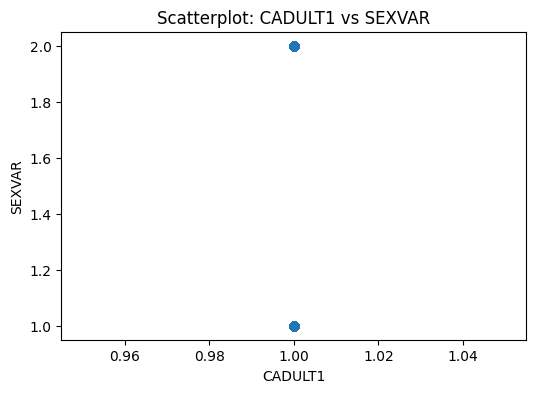

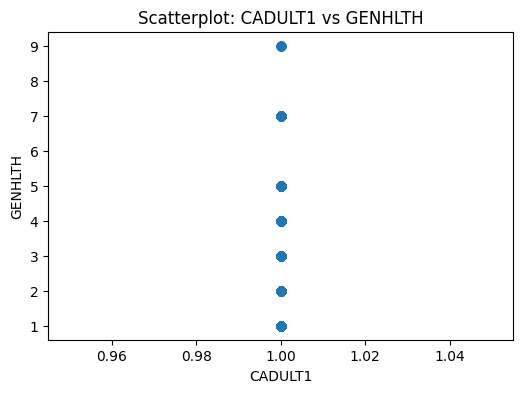

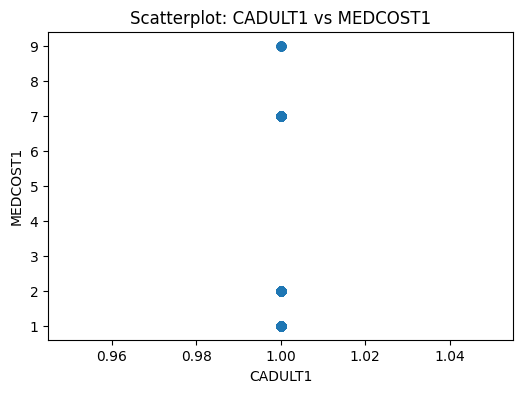

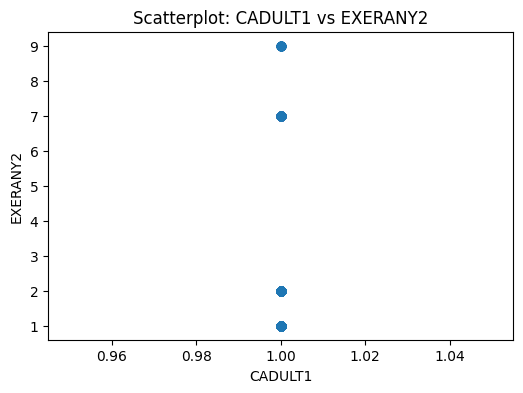

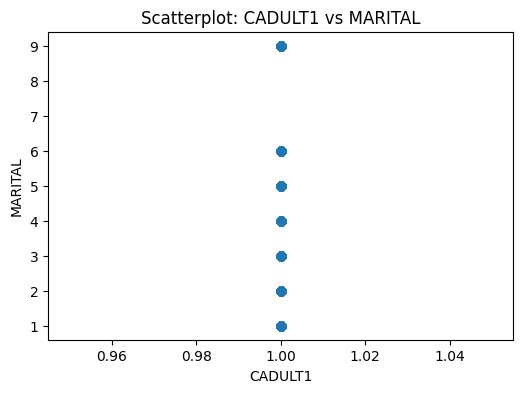

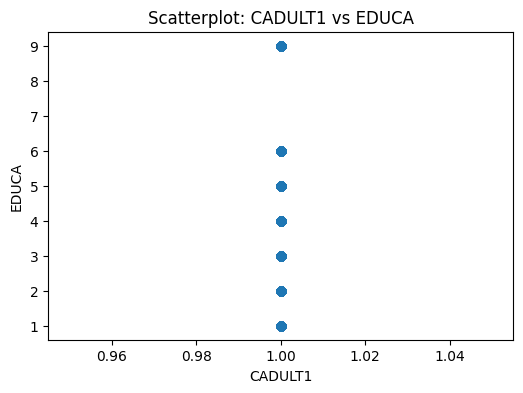

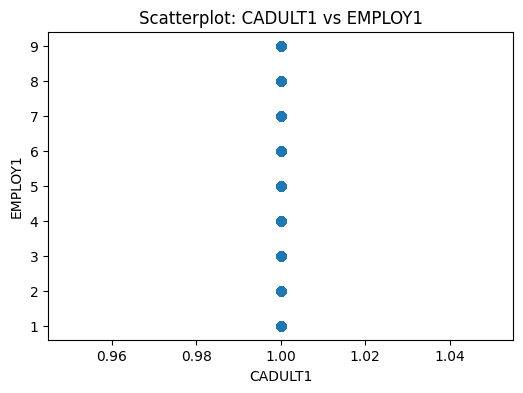

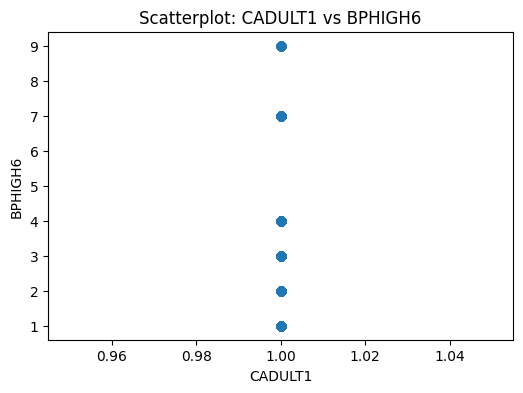

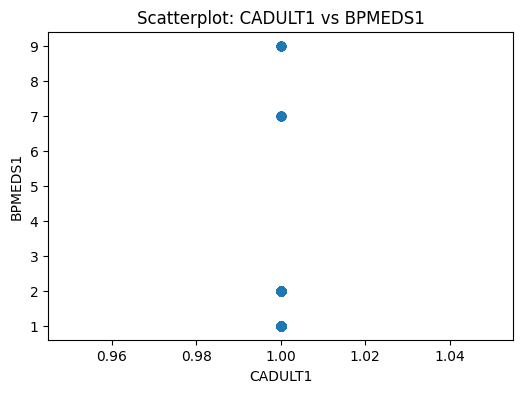

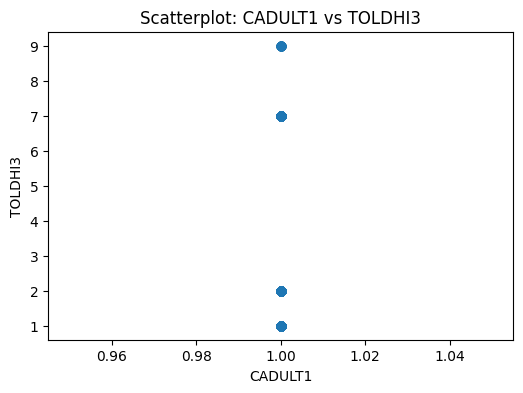

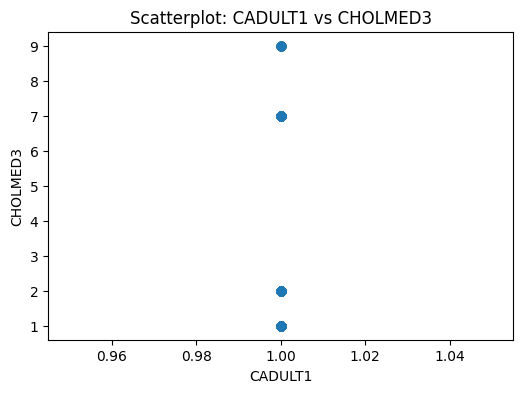

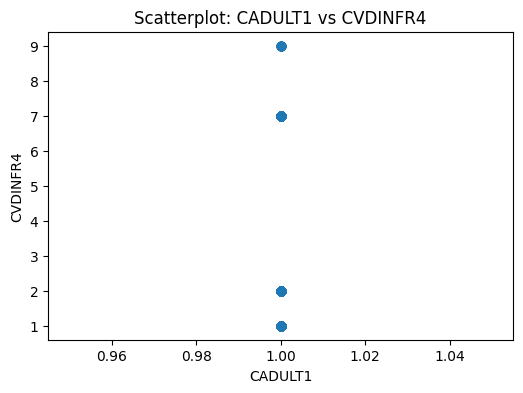

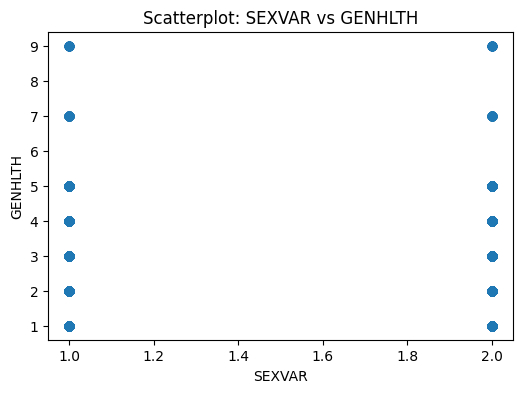

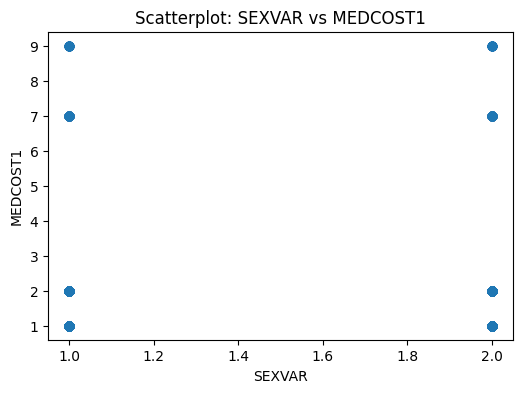

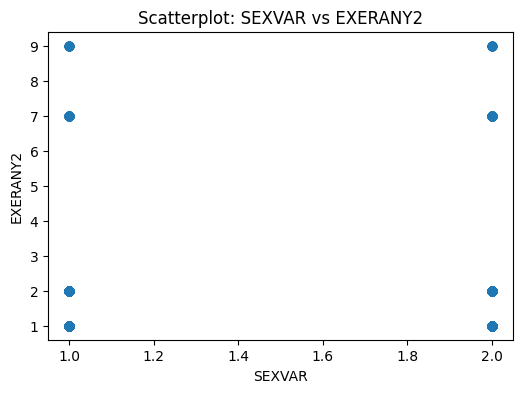

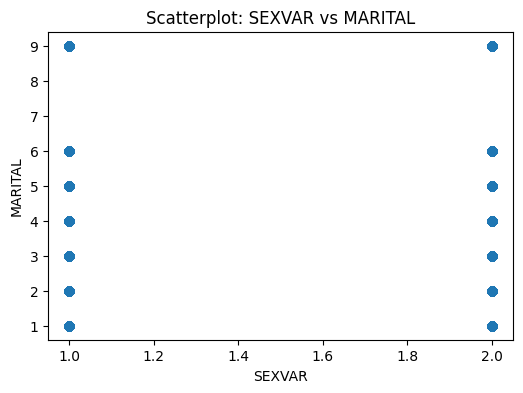

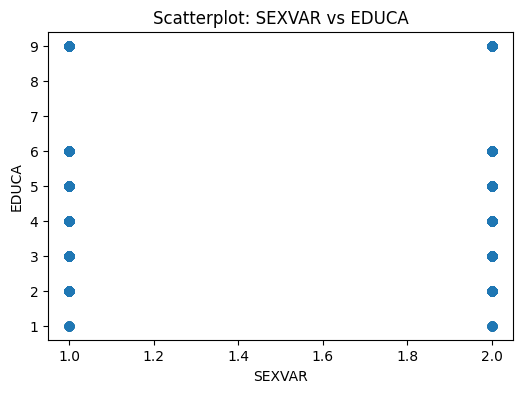

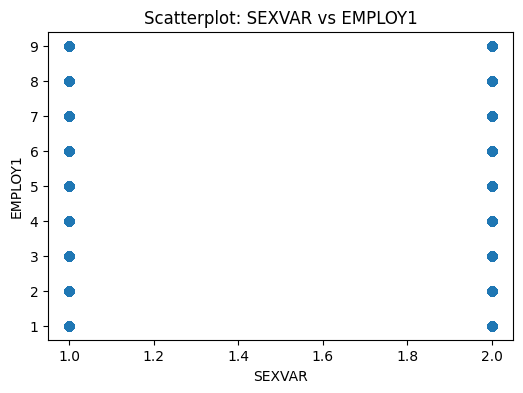

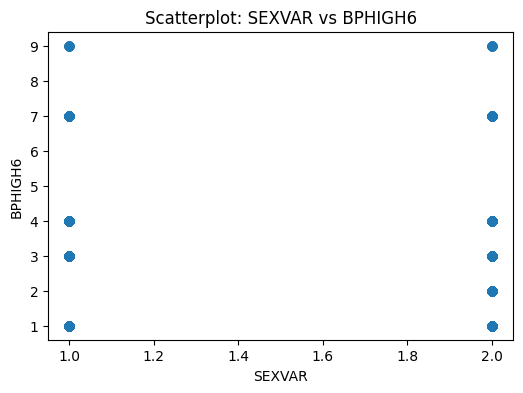

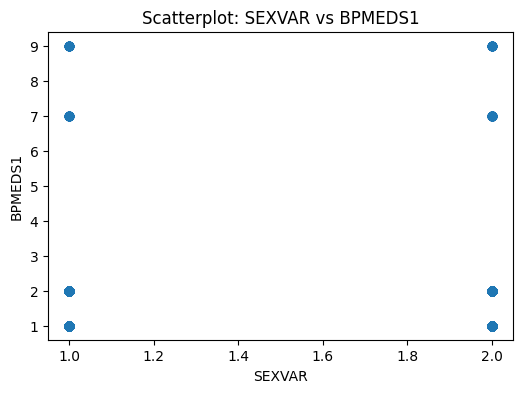

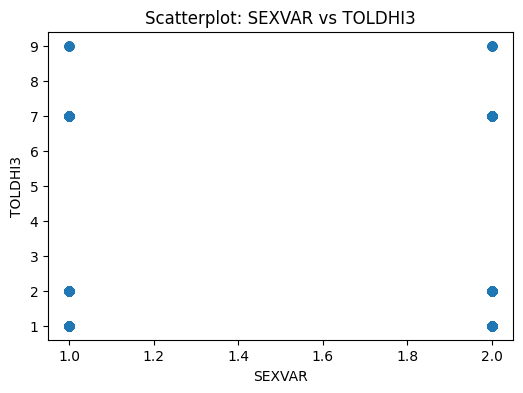

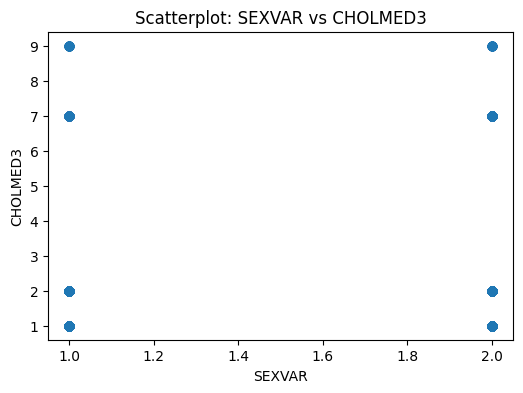

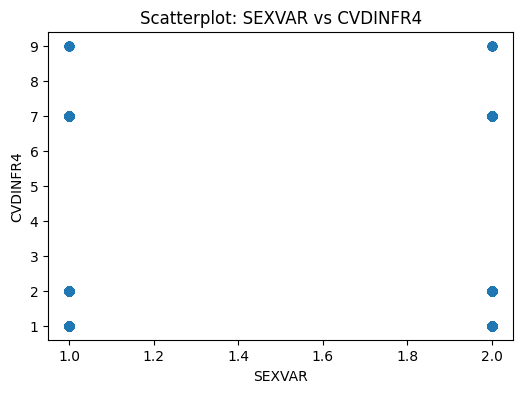

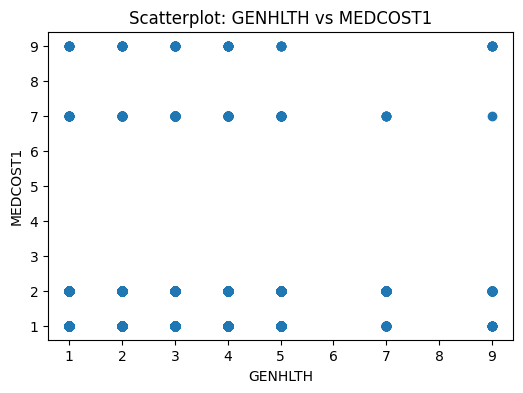

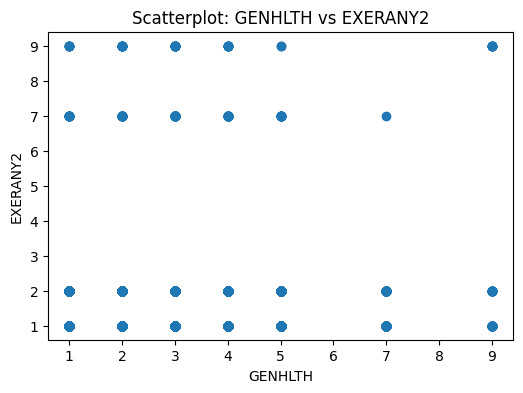

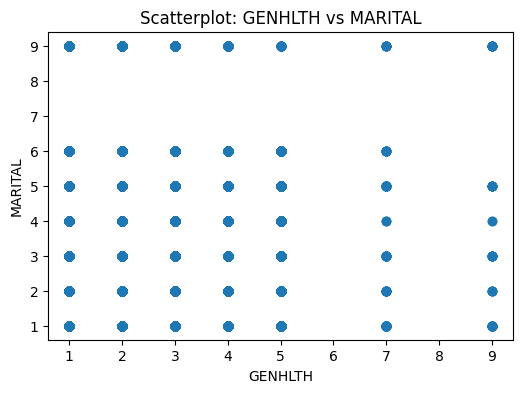

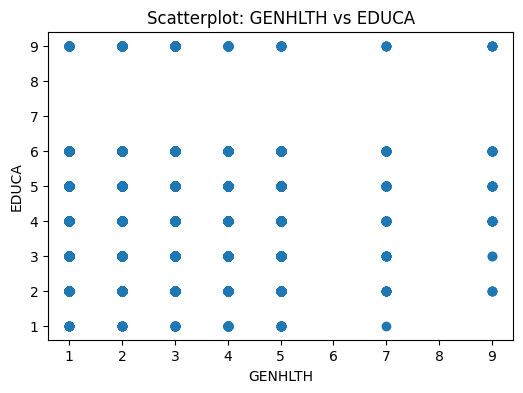

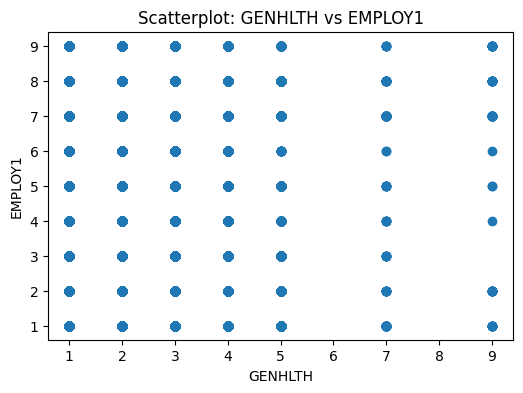

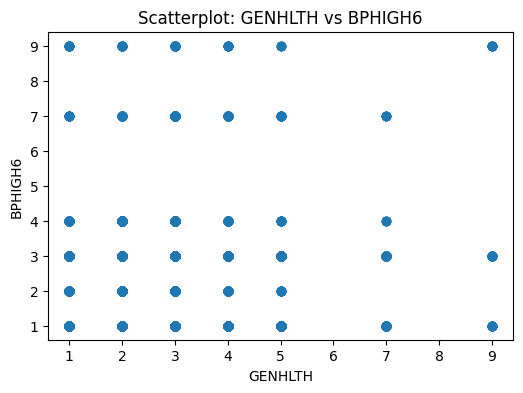

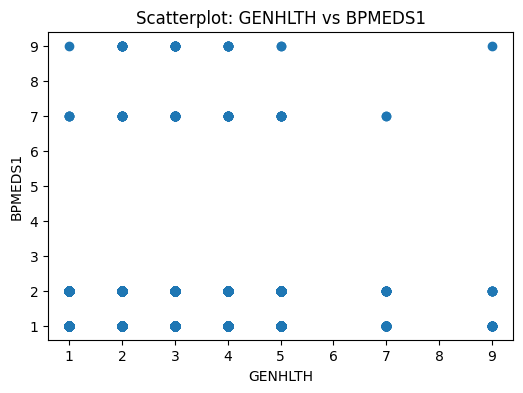

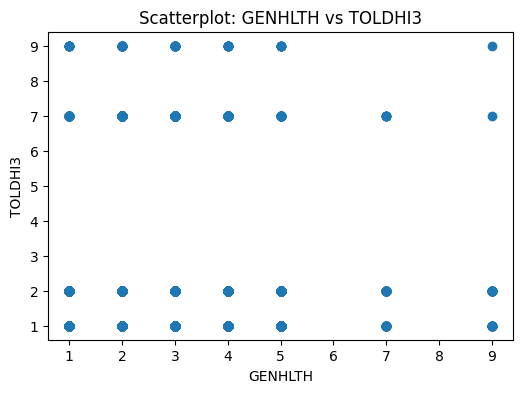

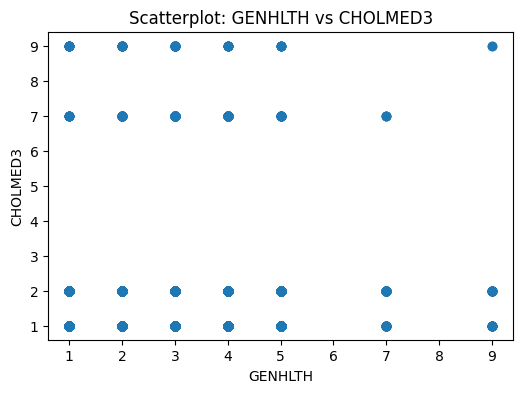

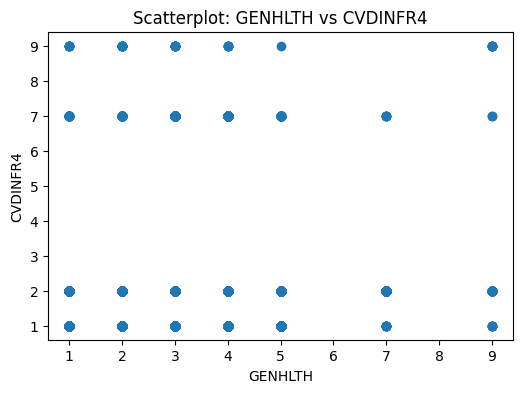

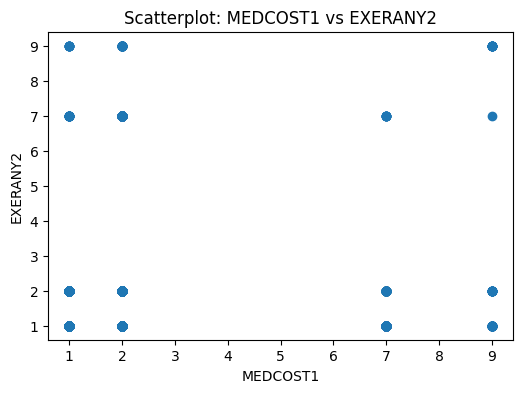

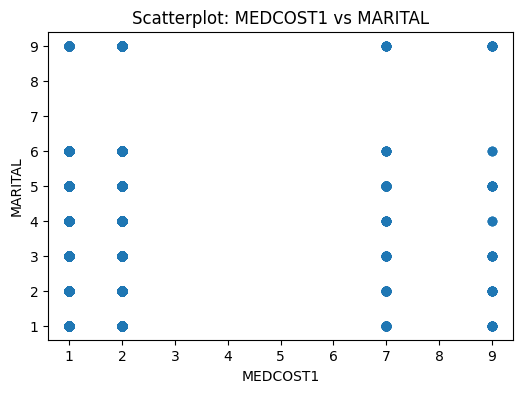

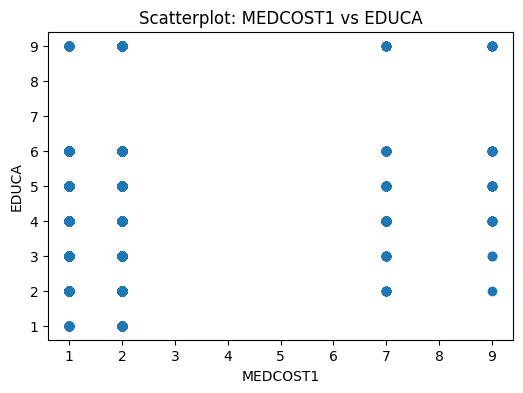

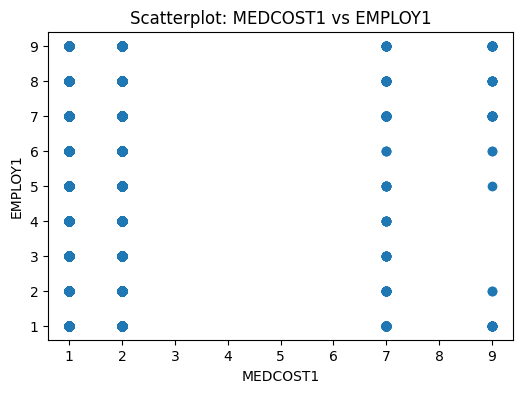

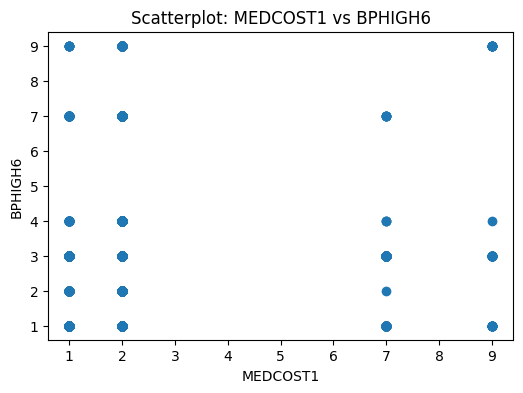

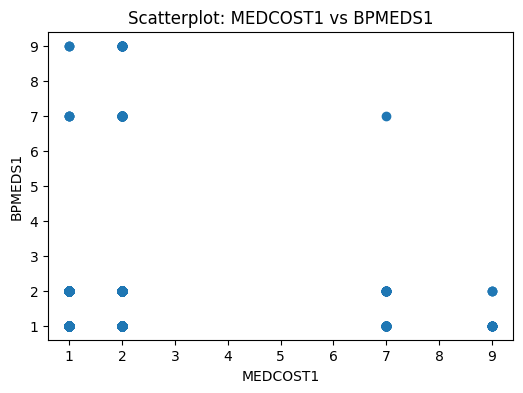

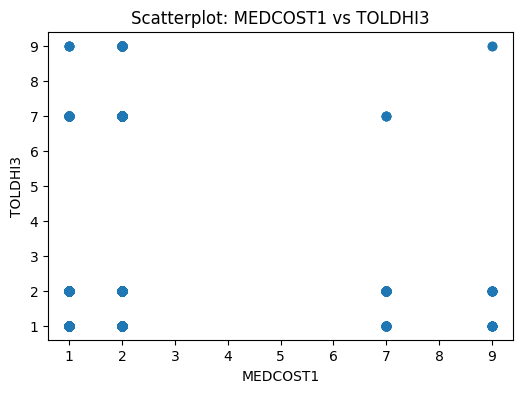

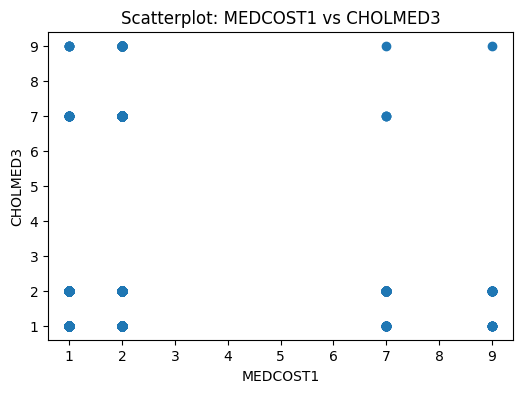

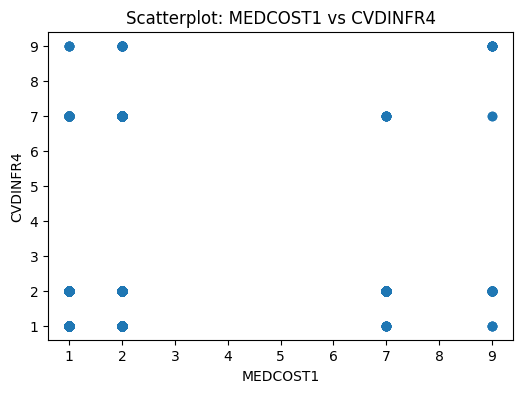

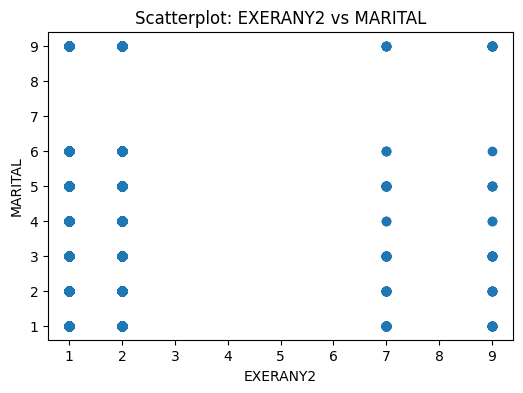

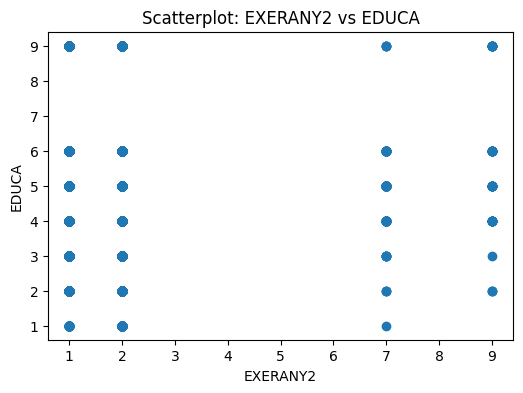

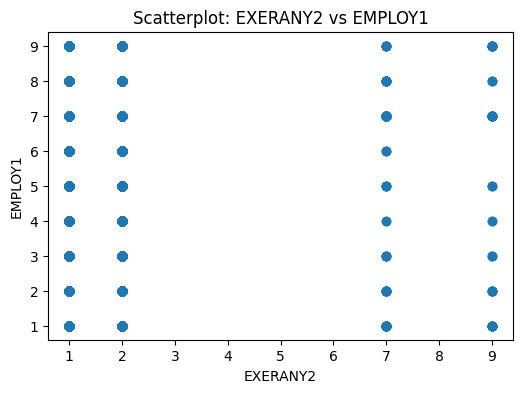

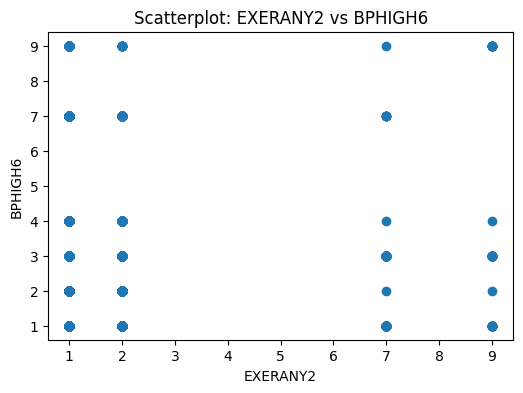

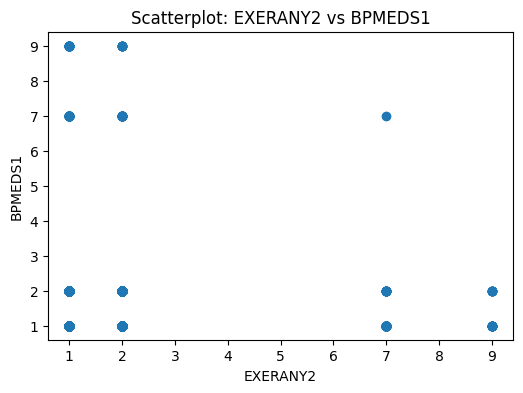

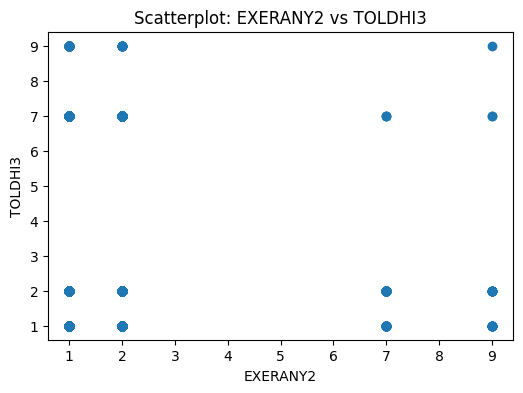

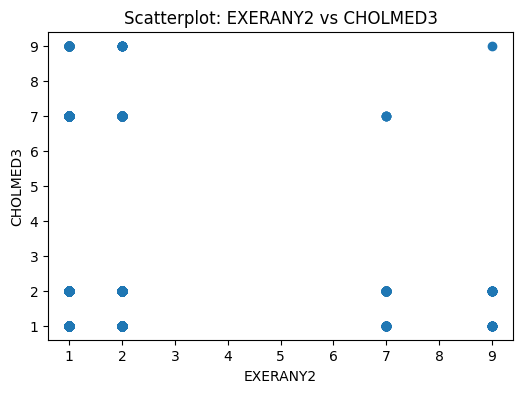

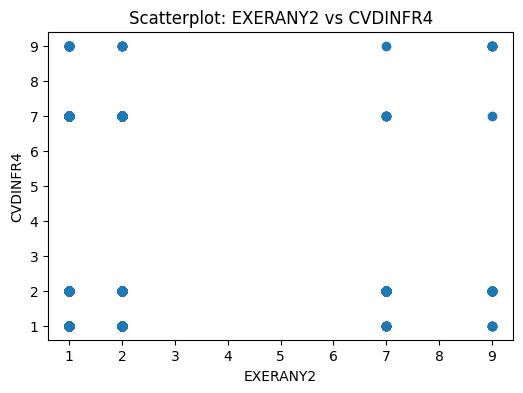

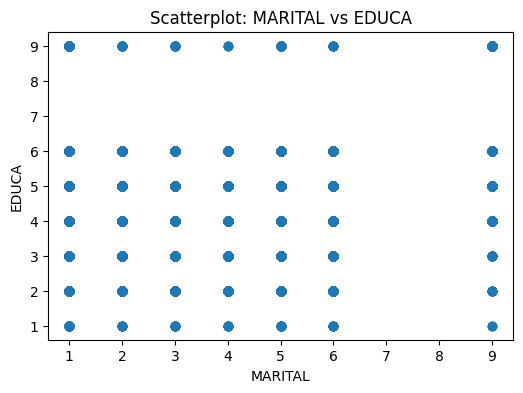

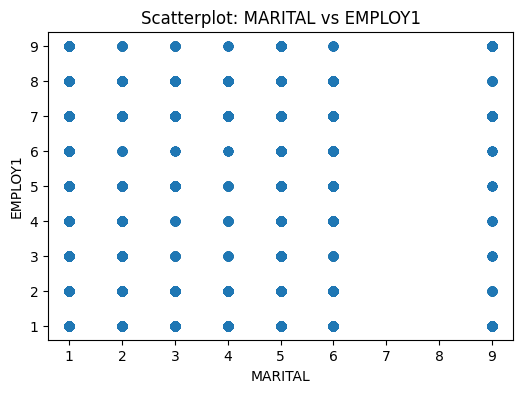

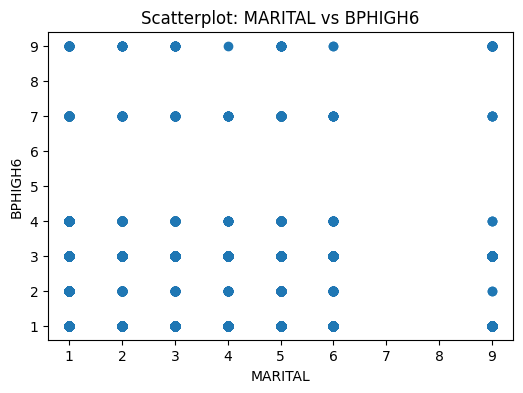

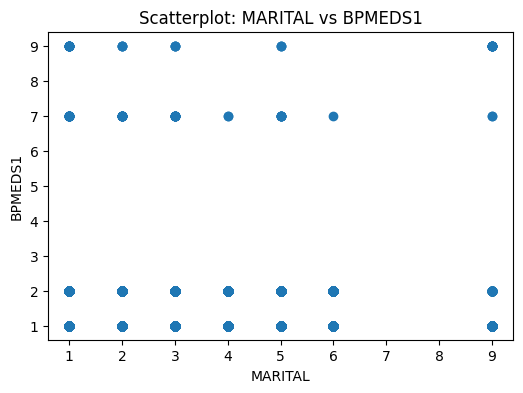

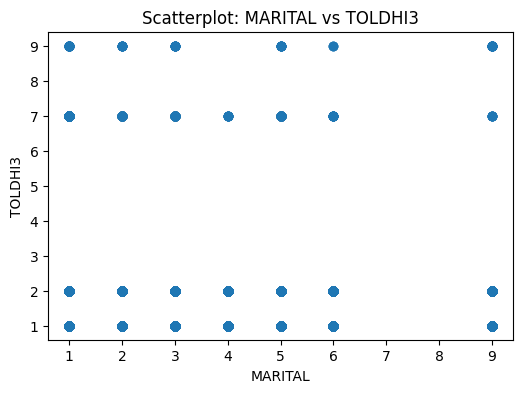

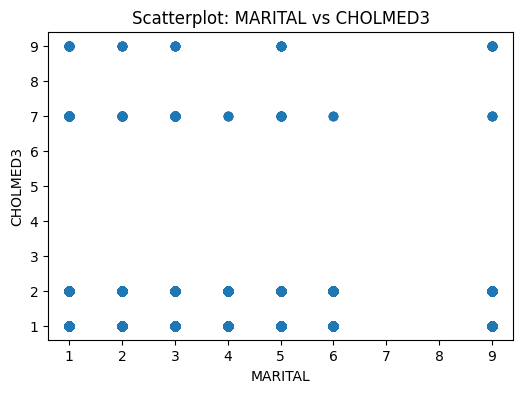

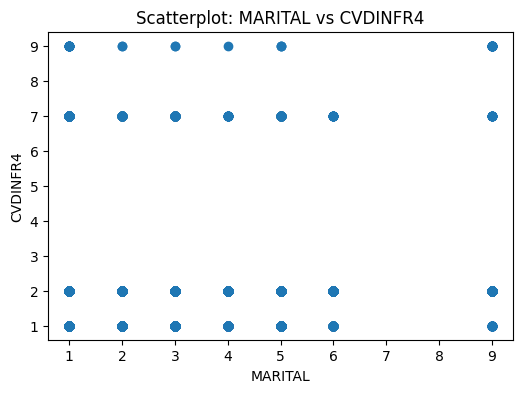

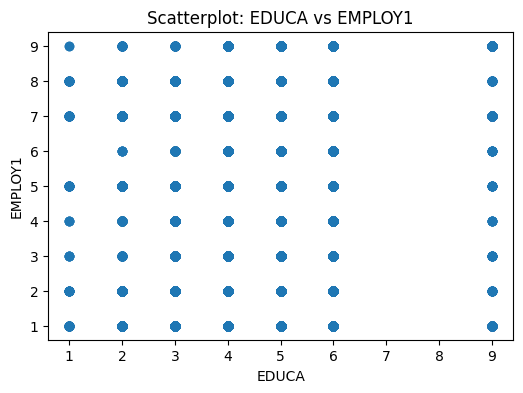

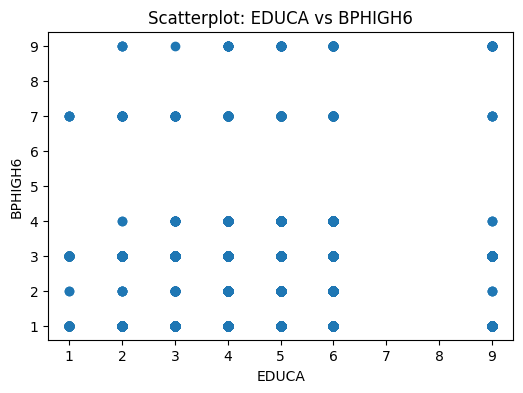

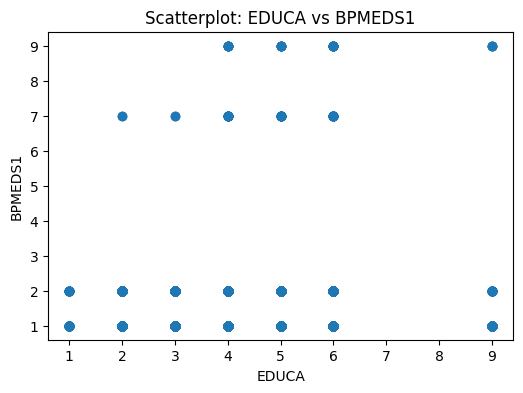

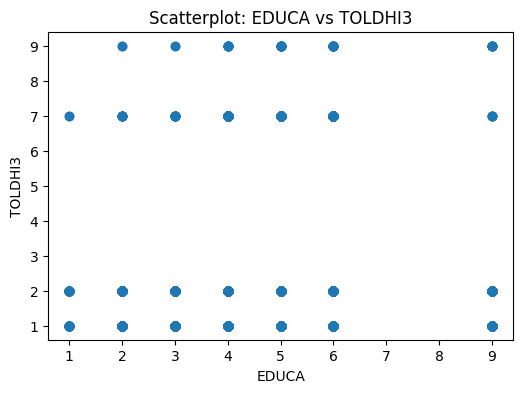

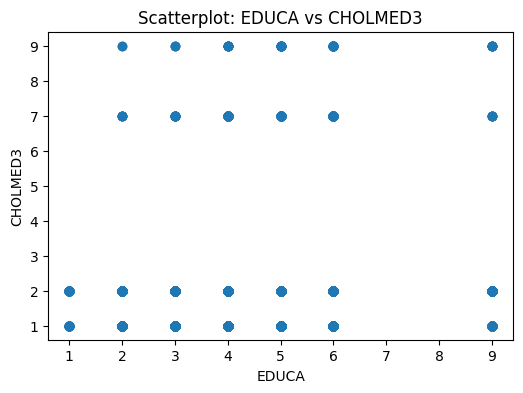

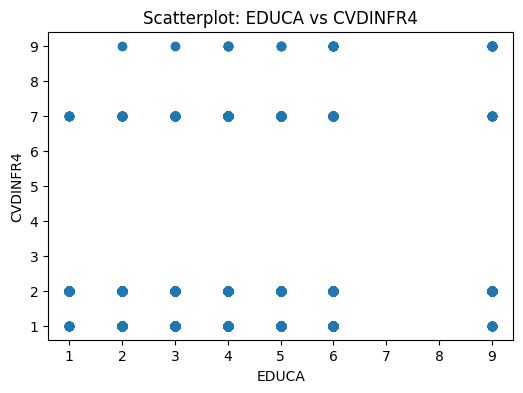

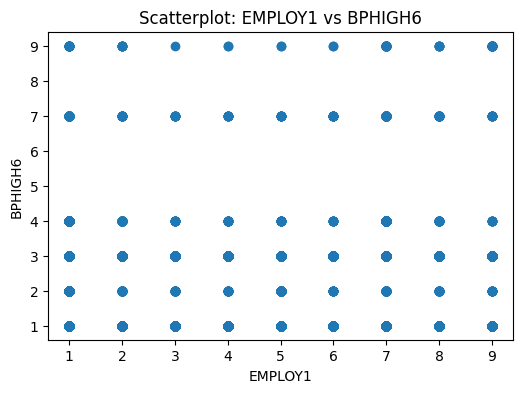

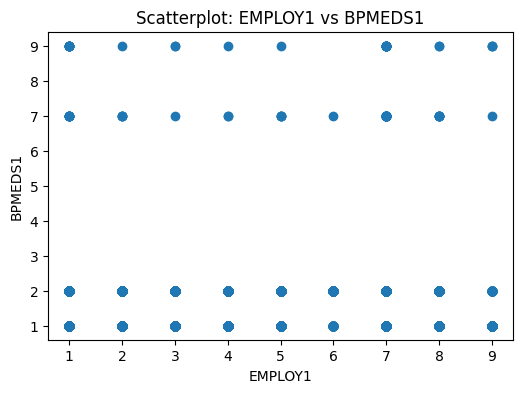

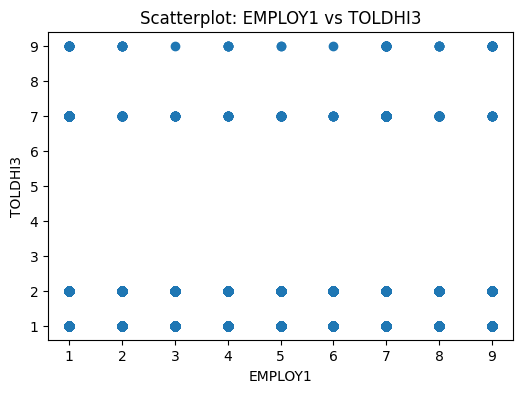

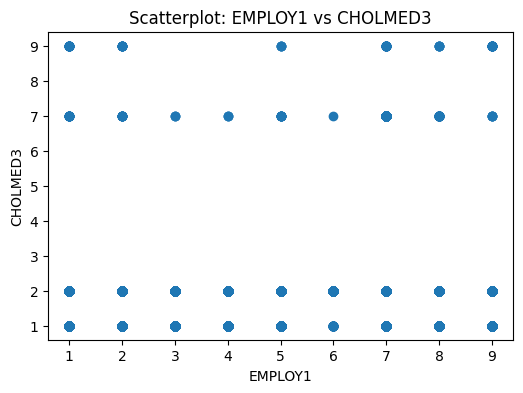

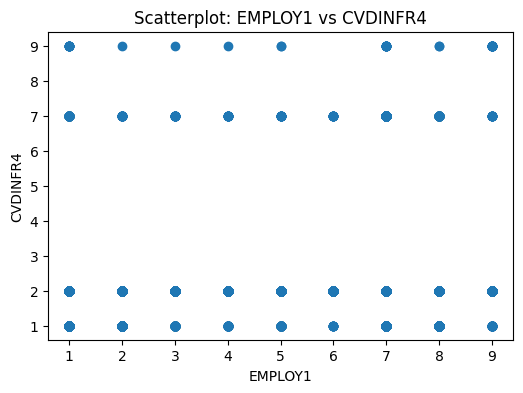

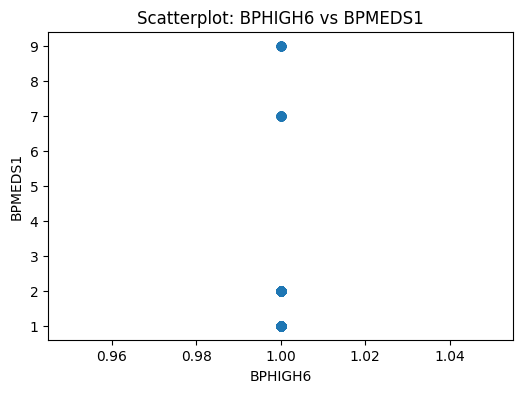

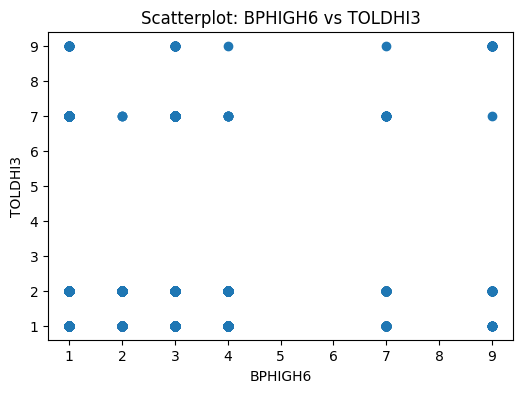

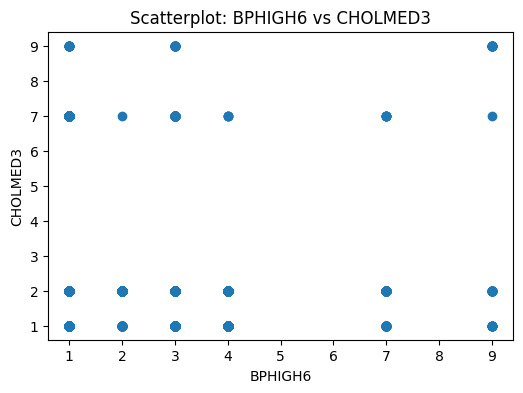

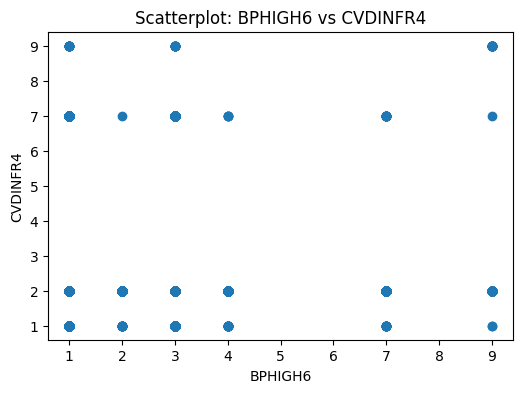

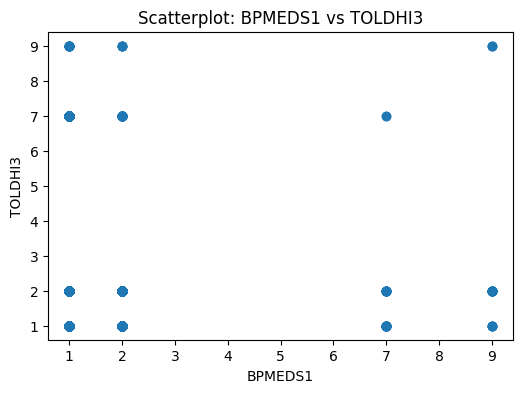

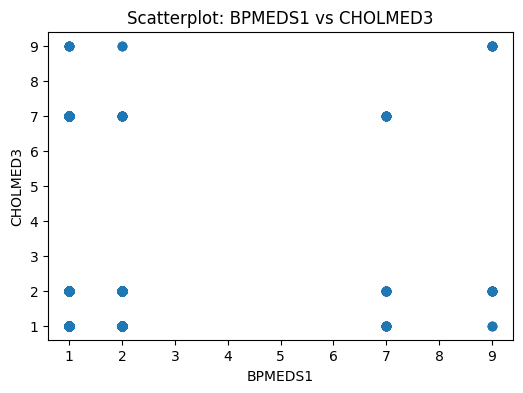

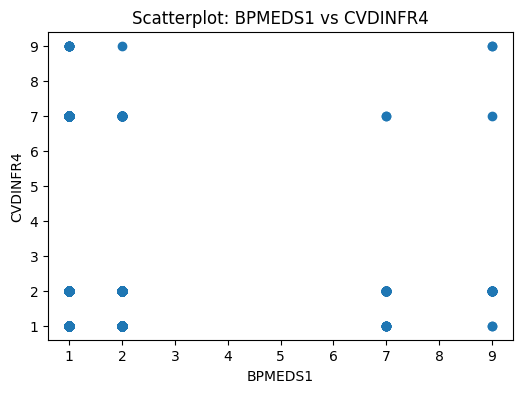

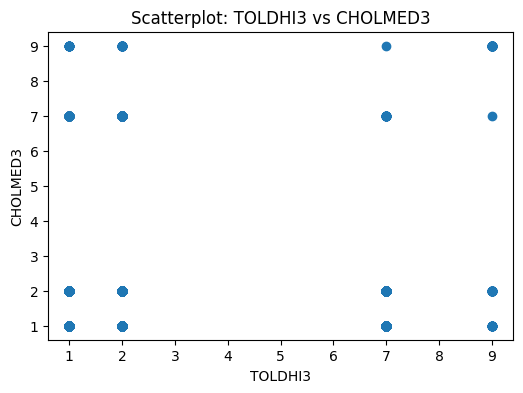

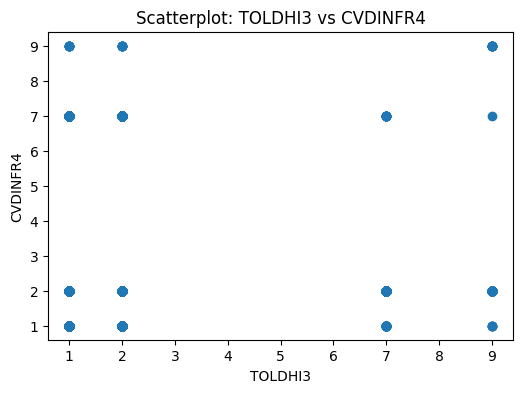

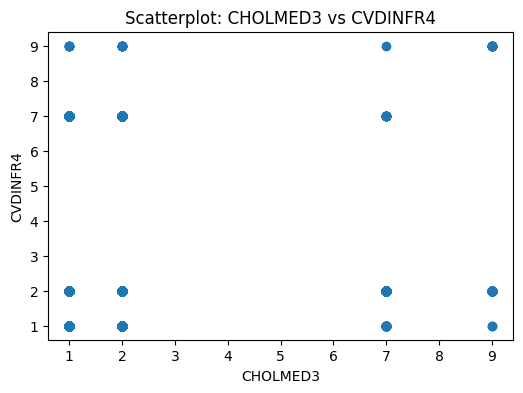

In [23]:
for pair in pairs:
    plt.figure(figsize=(6,4))
    plt.scatter(dataset[pair[0]], dataset[pair[1]])
    plt.title(f'Scatterplot: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

plt.show()

In [8]:
# Define categorical columns for frequency analysis and visualization
categorical_cols = ['SEXVAR', 'GENHLTH', 'MEDCOST1', 'EXERANY2', 'MARITAL', 'EDUCA', 'EMPLOY1']
numerical_cols = ['CADULT1', 'BPHIGH6', 'BPMEDS1', 'TOLDHI3', 'CHOLMED3', 'EXRACT12']

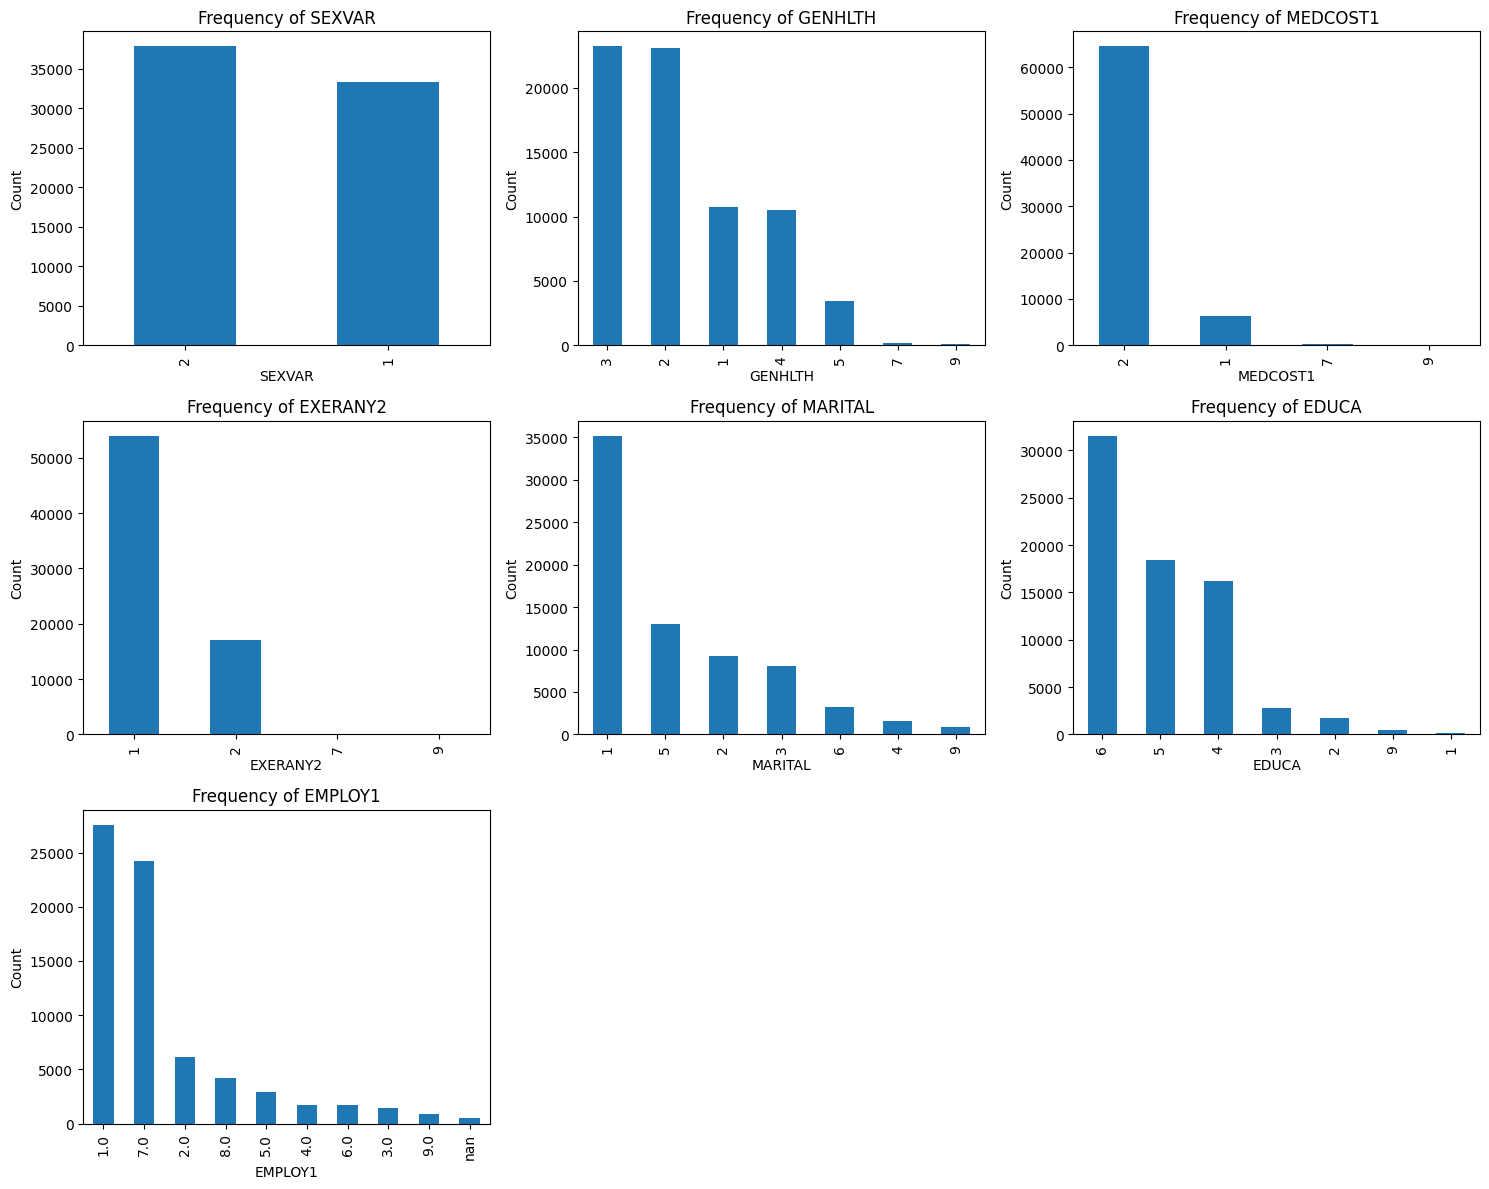

In [9]:
# Plotting frequency of categorical variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    dataset[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

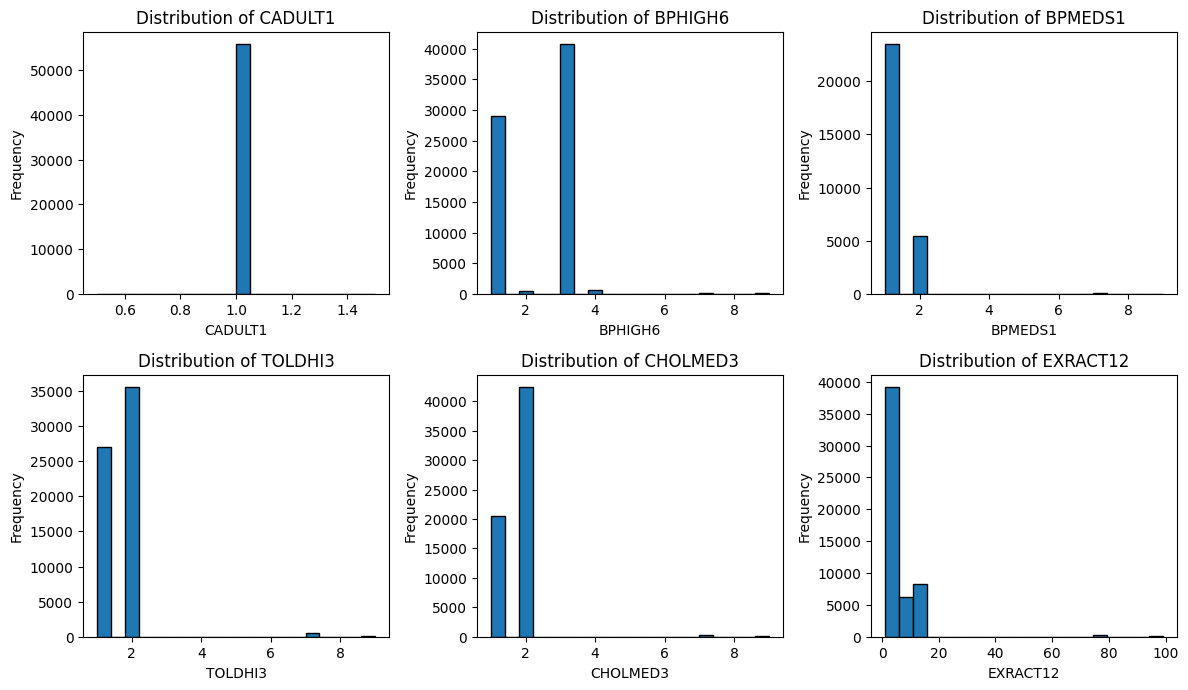

In [10]:
# Plotting histograms for numerical variables to explore distributions
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(dataset[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

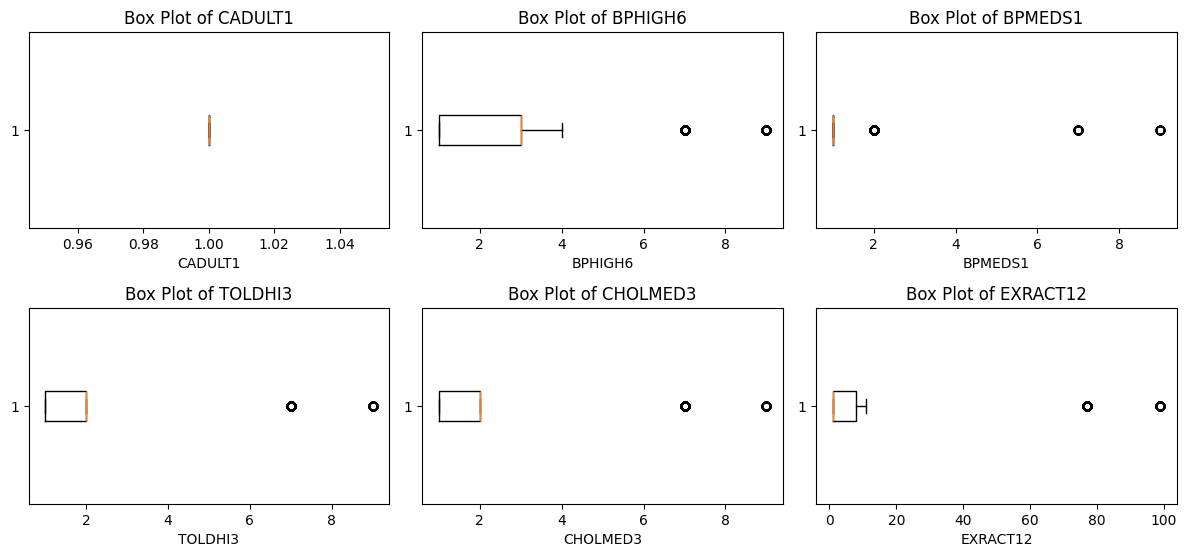

In [11]:
# Plotting box plots for outlier detection in the numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(dataset[col].dropna(), vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [12]:
# Function to calculate outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [13]:
# Detecting outliers and summarizing results for numerical columns
def outlier_check(dataset):
    outlier_summary = {}
    for col in numerical_cols:
        outliers, lower_bound, upper_bound = detect_outliers(dataset, col)
        outlier_summary[col] = {
            'Num_Outliers': len(outliers),
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Values': outliers[col].unique()
        }
    return outlier_summary

In [14]:
outlier_check(dataset)

{'CADULT1': {'Num_Outliers': 0,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([], dtype=float64)},
 'BPHIGH6': {'Num_Outliers': 356,
  'Lower_Bound': -2.0,
  'Upper_Bound': 6.0,
  'Outlier_Values': array([7, 9], dtype=int64)},
 'BPMEDS1': {'Num_Outliers': 5542,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([2., 7., 9.])},
 'TOLDHI3': {'Num_Outliers': 575,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([7., 9.])},
 'CHOLMED3': {'Num_Outliers': 324,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([7., 9.])},
 'EXRACT12': {'Num_Outliers': 380,
  'Lower_Bound': -9.5,
  'Upper_Bound': 18.5,
  'Outlier_Values': array([99., 77.])}}

### Outlier
- **BPHIGH6:**
    - 356 outliers
    - Outlier values: 7 and 9
    - Bounds: values outside of the range [-2; 6] are consider outliers

- **BPMEDS1:**
    - 5542 outliers
    - Outlier values: 2, 7, and 9
    - Bounds: values different from 1 are outliers, indicating that 1 is likely the expected response

- **TOLDHI3:**
    - 575 outliers
    - Outlier values: 7 and 9
    - Bounds: Values outside of the range [-0.5; 3.5] are consider outliers

- **CHOLMED3:**
    - 324 outliers
    - Outlier values: 7 and 9
    - Bounds: Values outside of the range [-0.5; 3.5] are consider outliers

The outlier values `7 and 9` appear across multiple variables and represent placeholder codes for "unknown" or "not applicable". These could be cleaned or inputed based on context. \
Imputing data with the median of the column.

In [15]:
# Impute outliers with the median of each column for the identified outlier values (7 and 9)
for col in numerical_cols:
    median_value = dataset[col].median()
    dataset[col] = dataset[col].replace([7, 9], median_value)

# Verify if the outliers have been replaced
outlier_check(dataset)


{'CADULT1': {'Num_Outliers': 0,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([], dtype=float64)},
 'BPHIGH6': {'Num_Outliers': 0,
  'Lower_Bound': -2.0,
  'Upper_Bound': 6.0,
  'Outlier_Values': array([], dtype=int64)},
 'BPMEDS1': {'Num_Outliers': 5450,
  'Lower_Bound': 1.0,
  'Upper_Bound': 1.0,
  'Outlier_Values': array([2.])},
 'TOLDHI3': {'Num_Outliers': 0,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([], dtype=float64)},
 'CHOLMED3': {'Num_Outliers': 0,
  'Lower_Bound': -0.5,
  'Upper_Bound': 3.5,
  'Outlier_Values': array([], dtype=float64)},
 'EXRACT12': {'Num_Outliers': 9529,
  'Lower_Bound': -3.5,
  'Upper_Bound': 8.5,
  'Outlier_Values': array([10., 11., 99., 77.])}}

In [16]:
# Handling missing values by imputing categorical columns with mode and numerical columns with median

# Impute categorical columns with mode
for col in categorical_cols:
    mode_value = dataset[col].mode()[0]  # Mode returns a series, so we select the first value
    dataset[col] = dataset[col].fillna(mode_value)

# Impute numerical columns with median
for col in numerical_cols:
    median_value = dataset[col].median()
    dataset[col] = dataset[col].fillna(median_value)

# Checking for missing values in the dataset
missing_values = dataset.isnull().sum()
missing_values

_STATE      0
DISPCODE    0
CADULT1     0
SEXVAR      0
GENHLTH     0
MEDCOST1    0
EXERANY2    0
EXRACT12    0
MARITAL     0
EDUCA       0
EMPLOY1     0
_IMPRACE    0
BPHIGH6     0
BPMEDS1     0
TOLDHI3     0
CHOLMED3    0
CVDINFR4    0
?           0
dtype: int64